In [2]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\qpnte\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\qpnte\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\qpnte\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
#data
data_list = pd.read_csv('data/listings.csv', index_col = 'id')
data_calendar = pd.read_csv('data/calendar.csv')
data_review = pd.read_csv('data/reviews.csv')

### some information about dataset

In [7]:
#the first element
data_list.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [8]:
data_calendar.head(1)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00


In [9]:
data_review.head(1)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...


In [16]:
# the quanlity rows and columns for each dataset
print(f'Size for data_listings: {len(data_list.index)} rows and {len(data_list.columns)} columns')
print(f'Size for data_calendar: {len(data_calendar.index)} rows and {len(data_calendar.columns)} columns')
print(f'Size for data_reviews: {len(data_review.index)} rows and {len(data_review.columns)} columns')

Size for data_listings: 3818 rows and 91 columns
Size for data_calendar: 1393570 rows and 4 columns
Size for data_reviews: 84849 rows and 6 columns


In [25]:
#datatype for each dataset
data_list.dtypes.value_counts()

object     62
float64    17
int64      12
dtype: int64

In [26]:
data_calendar.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [27]:
data_review.dtypes.value_counts()

int64     3
object    3
dtype: int64

In [17]:
#Below code shows the columns names that do not have any missing values and all values are unique (different from each other) 
df_lis.nunique()[df_lis.nunique()==len(df_lis)]

id             3818
listing_url    3818
picture_url    3818
latitude       3818
longitude      3818
dtype: int64

In [29]:
#The number of missing values for each columns (each dataset)
data_list.isnull().sum().sort_values(ascending=False)[:10]

license                  3818
square_feet              3721
monthly_price            2301
security_deposit         1952
weekly_price             1809
notes                    1606
neighborhood_overview    1032
cleaning_fee             1030
transit                   934
host_about                859
dtype: int64

In [30]:
data_calendar.isnull().sum().sort_values(ascending=False)

price         459028
listing_id         0
date               0
available          0
dtype: int64

In [31]:
data_review.isnull().sum().sort_values(ascending=False)

comments         18
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
dtype: int64

#### Question 1
What are the most common amenities?

In [35]:
data_list['amenities']

id
241032      {TV,"Cable TV",Internet,"Wireless Internet","A...
953595      {TV,Internet,"Wireless Internet",Kitchen,"Free...
3308979     {TV,"Cable TV",Internet,"Wireless Internet","A...
7421966     {Internet,"Wireless Internet",Kitchen,"Indoor ...
278830      {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                                  ...                        
8101950     {TV,"Cable TV",Internet,"Wireless Internet","A...
8902327     {TV,"Cable TV",Internet,"Wireless Internet",Ki...
10267360    {"Cable TV","Wireless Internet",Kitchen,"Free ...
9604740     {TV,"Wireless Internet",Kitchen,"Free Parking ...
10208623    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object

In [40]:
# Extract amenities from the 'amenities' column
amenities_list = data_list['amenities'].str.replace('[{}"]', '').str.split(',')

# Flatten the list of lists to get a single list of all amenities
all_amenities = [item for sublist in amenities_list for item in sublist if item]

# Convert to a pandas Series for counting
amenities_series = pd.Series(all_amenities)

# Count occurrences of each amenity
amenity_counts = amenities_series.value_counts()
amenity_counts


C:\Users\qpnte\AppData\Local\Temp\ipykernel_22368\2213114877.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = data_list['amenities'].str.replace('[{}"]', '').str.split(',')


Wireless Internet             3667
Heating                       3627
Kitchen                       3423
Smoke Detector                3281
Essentials                    3237
Dryer                         2997
Washer                        2992
Internet                      2811
Shampoo                       2670
TV                            2574
Carbon Monoxide Detector      2485
Fire Extinguisher             2196
Free Parking on Premises      2167
Family/Kid Friendly           1963
First Aid Kit                 1680
Cable TV                      1446
Indoor Fireplace               886
Pets live on this property     883
Hangers                        846
Elevator in Building           785
Hair Dryer                     774
Laptop Friendly Workspace      745
Iron                           742
Safety Card                    727
Air Conditioning               677
24-Hour Check-in               616
Buzzer/Wireless Intercom       538
Dog(s)                         509
Pets Allowed        

The most common amenitie are:

- Wireless Internet    3667
- Heating              3627
- Kitchen              3423
- Smoke Detector       3281
- Essentials           3237
- Dryer                2997
- Washer               2992
- Internet             2811
- Shampoo              2670
- TV                   2574


#### Question 2

What is thing effect to the price? (Listing table)

In [43]:
# The price
data_list['price'] = data_list['price'].replace('[$,]', '').astype(float)

price_stats = data_list['price'].describe()
price_stats


count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [45]:
# Get the distribution of room types
room_type_distribution = data_list['room_type'].value_counts(normalize=True) * 100
room_type_distribution


Entire home/apt    66.553169
Private room       30.382399
Shared room         3.064432
Name: room_type, dtype: float64

In [47]:
# Distribution of number of bedrooms and bathrooms
bedroom_distribution = data_list['bedrooms'].value_counts(normalize=True) * 100
bathroom_distribution = data_list['bathrooms'].value_counts(normalize=True) * 100

bedroom_distribution, bathroom_distribution


(1.0    63.405037
 2.0    16.789087
 0.0     9.758657
 3.0     7.423924
 4.0     1.810073
 5.0     0.629591
 6.0     0.157398
 7.0     0.026233
 Name: bedrooms, dtype: float64,
 1.0    75.802209
 2.0     9.810626
 1.5     6.522883
 2.5     3.261441
 3.0     1.683325
 3.5     1.499211
 0.5     0.815360
 4.0     0.210416
 0.0     0.210416
 4.5     0.078906
 8.0     0.052604
 5.0     0.052604
 Name: bathrooms, dtype: float64)

According to price distribution as well as influencing factors, the number of single rooms and whole houses is dominant

### Question 3
How to price their listings competitively based on their neighborhood, and guests can make informed decisions about where to stay based on their budget.

In [50]:
# Calculate average price by neighbourhood
average_price_by_neighbourhood = data_list.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

average_price_by_neighbourhood


neighbourhood_cleansed
Southeast Magnolia    231.705882
Portage Bay           227.857143
Westlake              194.470588
West Queen Anne       187.769231
Montlake              182.789474
                         ...    
North Delridge         76.375000
Georgetown             76.125000
South Delridge         74.666667
Olympic Hills          71.687500
Rainier Beach          68.555556
Name: price, Length: 87, dtype: float64

C:\Users\qpnte\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


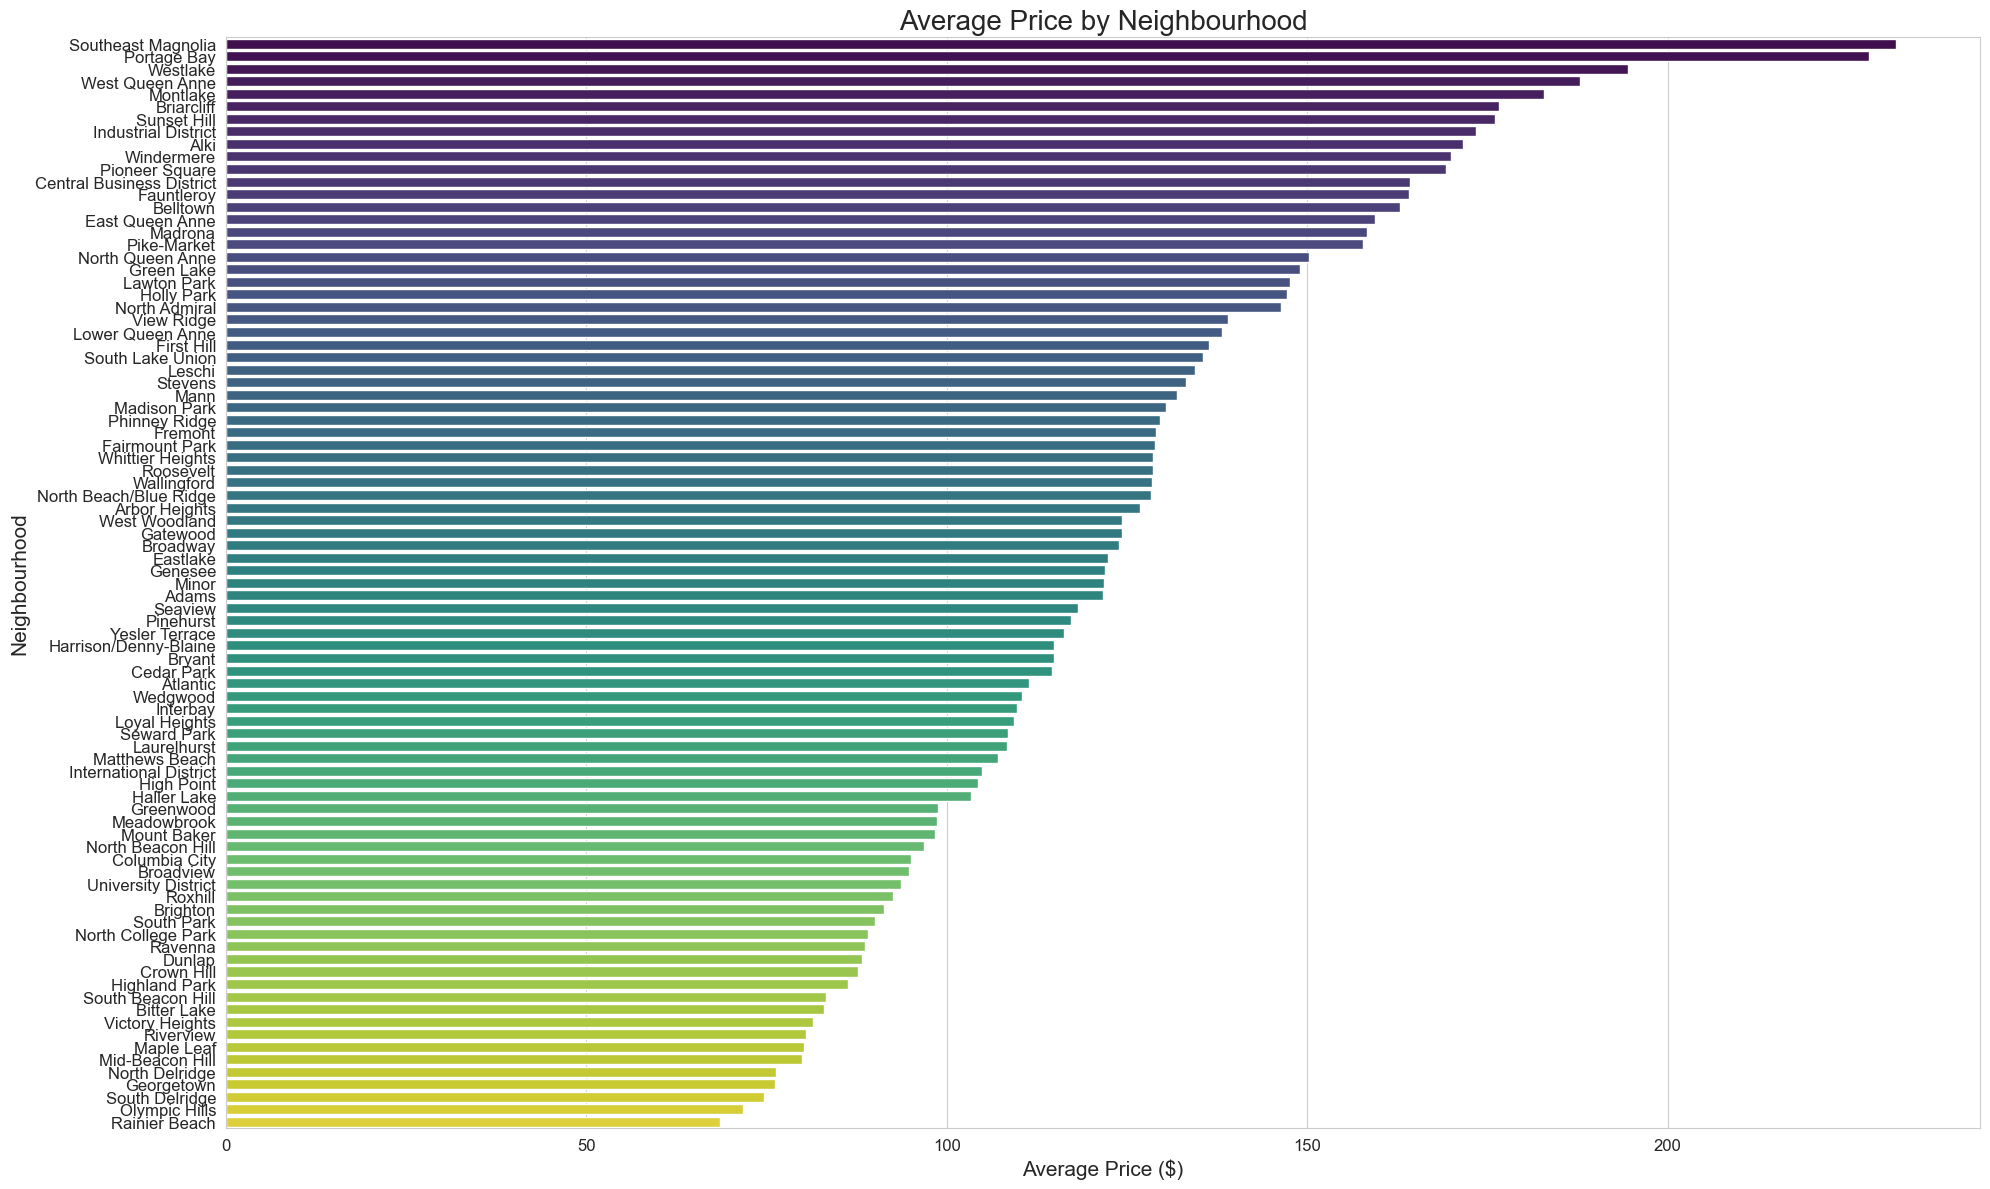

In [51]:
# Set figure size and style
plt.figure(figsize=(20, 12))
sns.set_style("whitegrid")

# Plot average price by neighbourhood
sns.barplot(y=average_price_by_neighbourhood.index, x=average_price_by_neighbourhood.values, palette="viridis")

plt.title('Average Price by Neighbourhood', fontsize=20)
plt.xlabel('Average Price ($)', fontsize=15)
plt.ylabel('Neighbourhood', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


The bar chart visualizes the average price of Airbnb listings across different neighborhoods. From the chart:

Neighborhoods like "Southeast Magnolia", "Portage Bay", and "Westlake" have higher average prices, making them some of the most expensive areas for Airbnb listings.

On the other end of the spectrum, areas like "Olympic Hills" and "Rainier Beach" have lower average prices, indicating that these might be more budget-friendly areas for travelers.

The wide range in average prices across different neighborhoods suggests that location plays a significant role in determining the price of an Airbnb listing in this dataset.

## Question 4: 
Part 1: Identify Areas with the Highest Number of Positive Reviews

In [53]:
data_list.reset_index(inplace = True)

In [54]:
# Merge reviews and listings datasets to associate each review with its neighborhood
merged_data = data_review.merge(data_list[['id', 'neighbourhood_cleansed']], left_on='listing_id', right_on='id')

# Count the number of reviews per neighborhood
reviews_by_neighbourhood = merged_data['neighbourhood_cleansed'].value_counts()

# Display the top neighborhoods with the most reviews
top_neighbourhoods_reviews = reviews_by_neighbourhood.head(10)
top_neighbourhoods_reviews


Broadway                     8919
Belltown                     4686
Fremont                      4157
Wallingford                  4039
Minor                        3455
Central Business District    2526
First Hill                   2517
Stevens                      2436
North Beacon Hill            2356
West Woodland                2172
Name: neighbourhood_cleansed, dtype: int64

Part 2: Analyze Review Frequency Over Time

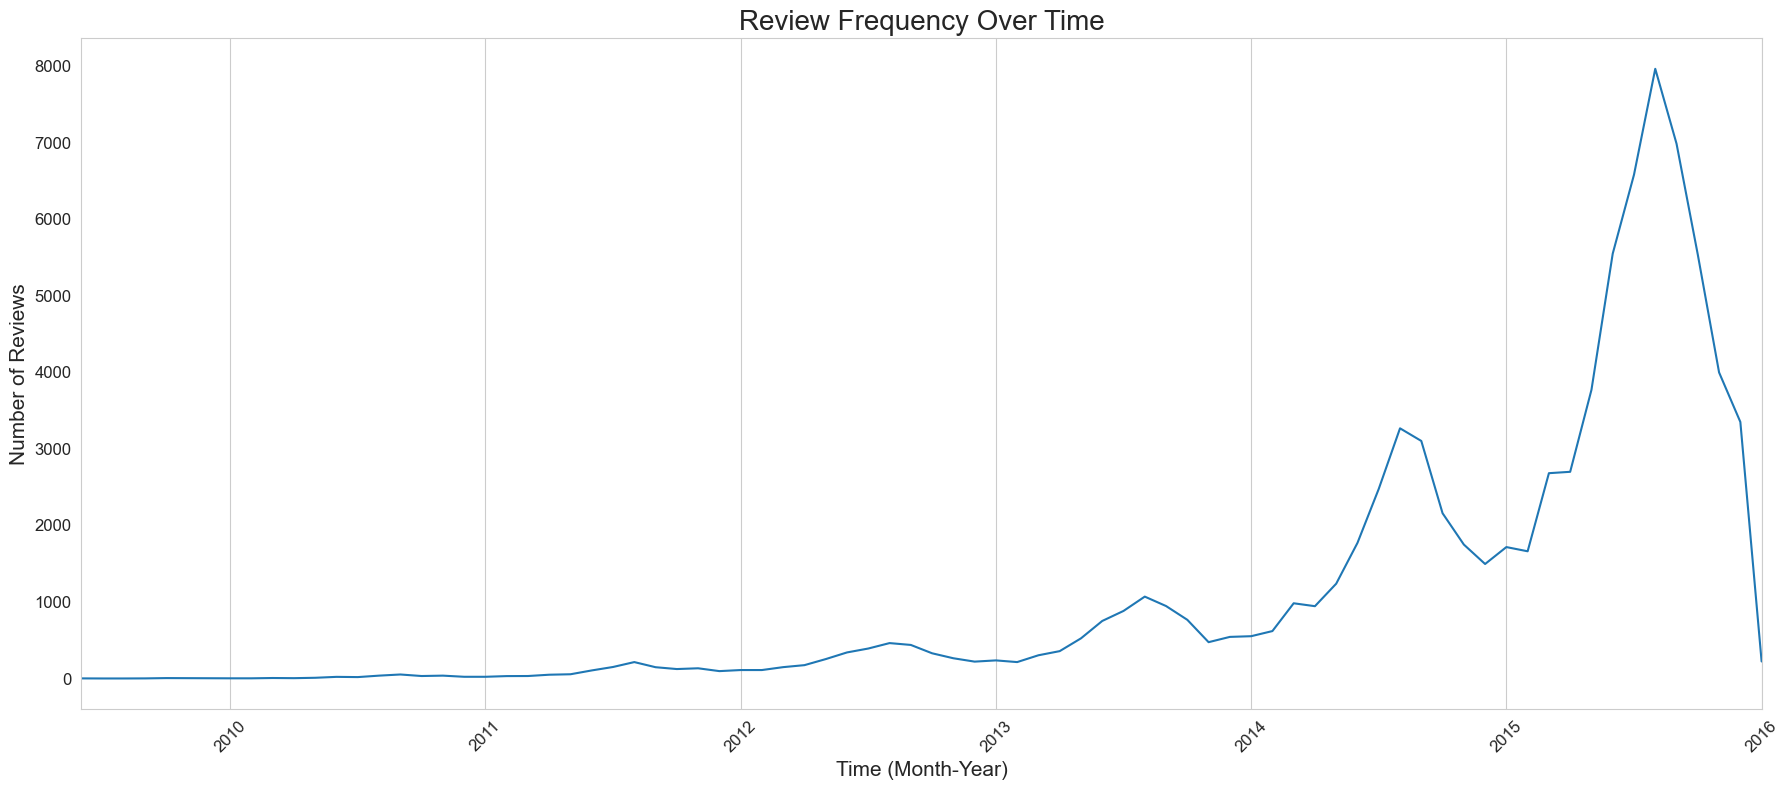

In [55]:
# Convert the 'date' column to datetime format
data_review['date'] = pd.to_datetime(data_review['date'])

# Extract month-year from the date and count the number of reviews for each month-year
reviews_over_time = data_review.groupby(data_review['date'].dt.to_period("M")).size()

# Plot the review frequency over time
plt.figure(figsize=(18, 8))
reviews_over_time.plot()
plt.title('Review Frequency Over Time', fontsize=20)
plt.xlabel('Time (Month-Year)', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


From the chart, we can observe several insights:

- Overall Increase: There's a general upward trend in the number of reviews over time, suggesting an increasing popularity or usage of Airbnb in the area.
- Seasonal Trends: There appear to be some periodic peaks and troughs, which might indicate seasonal trends in travel or Airbnb usage.
- Recent Surge: There's a noticeable surge in the number of reviews in recent months, indicating a potential increase in the popularity of the platform or perhaps a special event or attraction in the area during that time.